In [2]:
from torch.utils.data import DataLoader
from model import TransformersModel

from preprocess import ProcessGoEmotions, TokenizeDataset

In [3]:
PATH1 = "./data/full_dataset/goemotions_1.csv"
PATH2 = "./data/full_dataset/goemotions_2.csv"
PATH3 = "./data/full_dataset/goemotions_3.csv"

## With general emotions

----

In [3]:
LABEL = "emotion_category" # positive negative ambiguous and neutral
plot_mapping = {0: "neutral", 1: "ambiguous", 2: "negative", 3: "positive"}

----

In [4]:
process = ProcessGoEmotions(label_choice=LABEL)
train_dataset, test_dataset = process.get_datasets(paths=[PATH1], test_size = 0.2)

df = process.df
print(len(df))
df.head(3)

70000


,text,label
0,That game hurt.,2
1,>sexuality shouldn’t be a grouping category I...,3
2,"You do right, if you don't care then fuck 'em!",1


<Axes: ylabel='label'>

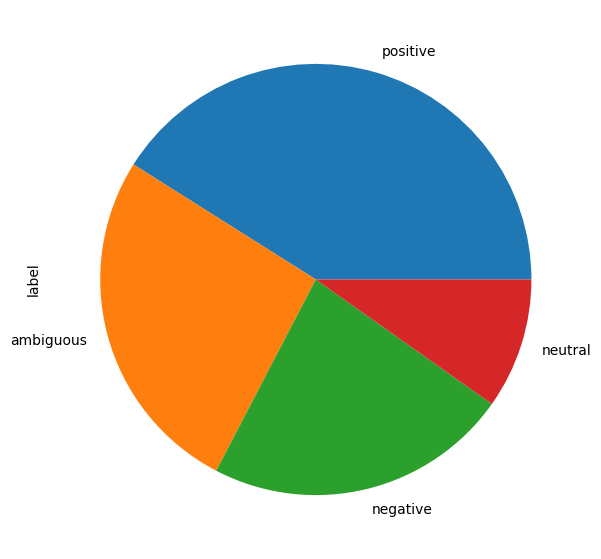

In [5]:
df['label'] = df['label'].map(plot_mapping)
df_class_count = df["label"].value_counts()
df_class_count.plot.pie(y="text", figsize=(10,7))

<Axes: >

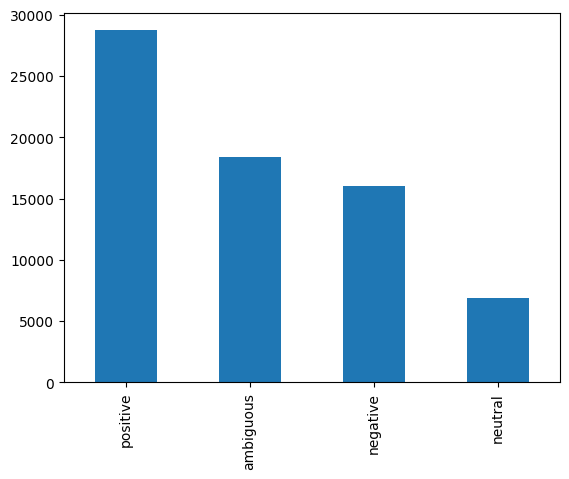

In [6]:
df_class_count.plot(kind='bar')

## With all the emotions

----

In [4]:
LABEL = "emotions"

-----

In [24]:
process = ProcessGoEmotions(label_choice=LABEL)
train_dataset, test_dataset = process.get_datasets(paths=[PATH1, PATH2, PATH3], test_size=0.2, drop_neutral=True)

df = process.df
print(len(df))
df.tail(3)

Removing 'neutral'
155927


,text,label
71222,That looks amazing,0
71223,The FDA has plenty to criticize. But like here...,12
71224,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,0


In [20]:
_, mapping, _ = process.get_mapping()

plot_mapping = {v: k for k, v in mapping.items()}

['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', 'anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness', 'confusion', 'curiosity', 'realization', 'surprise', 'neutral']


<Axes: ylabel='label'>

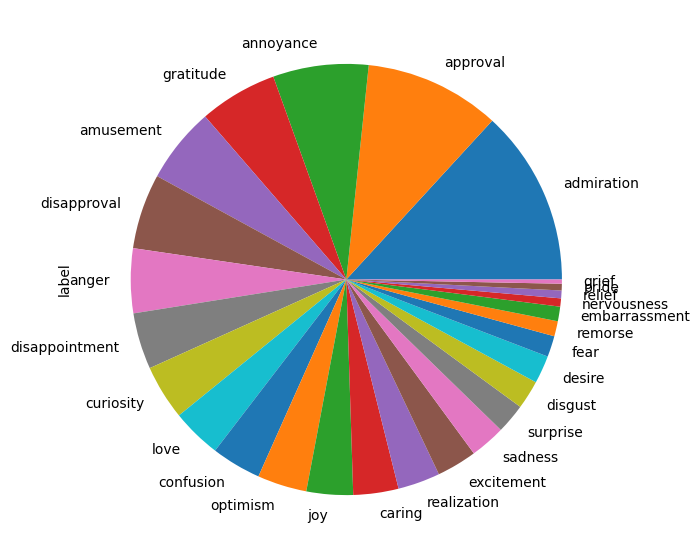

In [21]:
labels, _, _ = process.get_mapping()
print(labels)

df['label'] = df['label'].map(plot_mapping)
df_class_count = df["label"].value_counts()
df_class_count.plot.pie(y="text", figsize=(10,7))

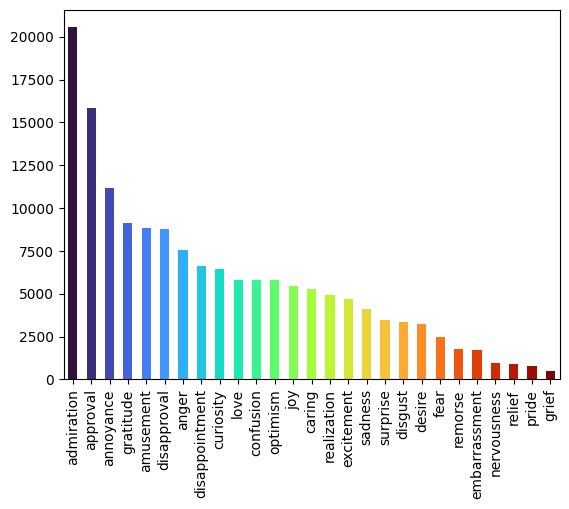

In [22]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('turbo')
ax = df_class_count.plot(kind='bar', color=cmap(np.linspace(0, 1, len(df_class_count))))
#df_class_count.plot(kind='bar')
plt.show()

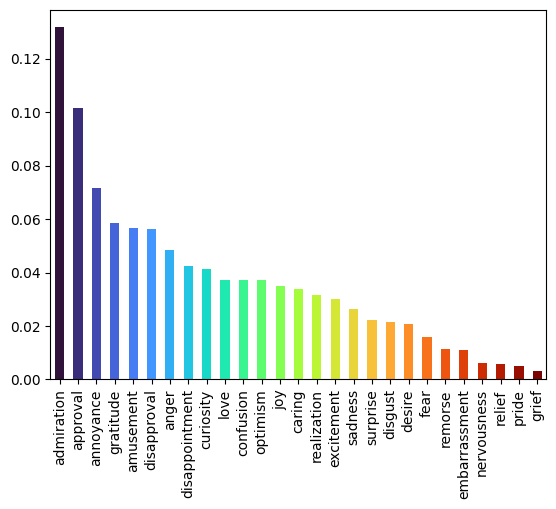

In [25]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('turbo')
df_class_percent = df_class_count/len(df)
ax = df_class_percent.plot(kind='bar', color=cmap(np.linspace(0, 1, len(df_class_count))))
#df_class_count.plot(kind='bar')
plt.show()

In [23]:
print(df_class_count/len(df))

admiration        0.131741
approval          0.101669
annoyance         0.071604
gratitude         0.058592
amusement         0.056834
disapproval       0.056308
anger             0.048407
disappointment    0.042263
curiosity         0.041141
love              0.037306
confusion         0.037306
optimism          0.037069
joy               0.034869
caring            0.033862
realization       0.031656
excitement        0.030085
sadness           0.026423
surprise          0.022267
disgust           0.021542
desire            0.020907
fear              0.015738
remorse           0.011358
embarrassment     0.010922
nervousness       0.006157
relief            0.005842
pride             0.005002
grief             0.003130
Name: label, dtype: float64
